          dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


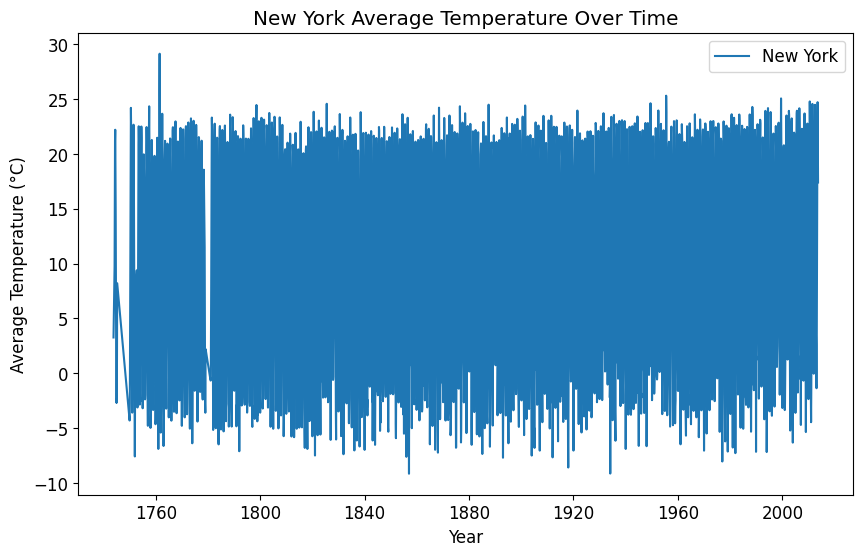

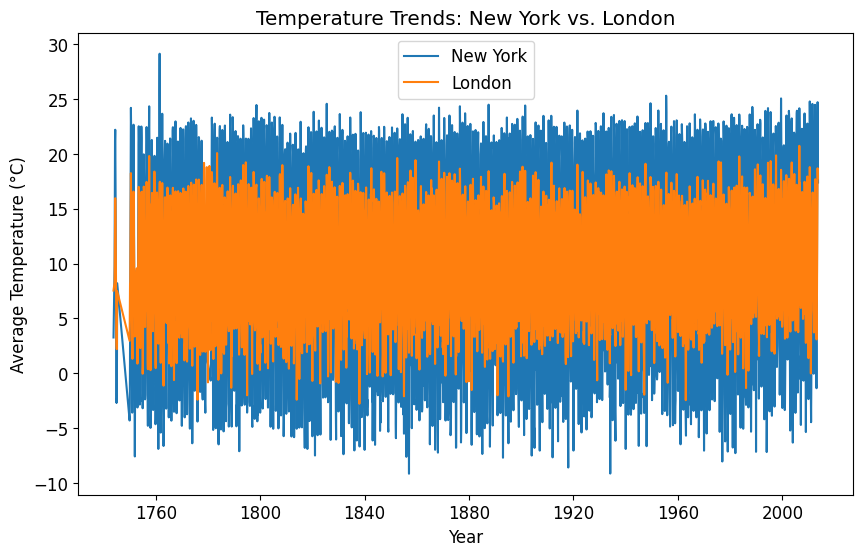

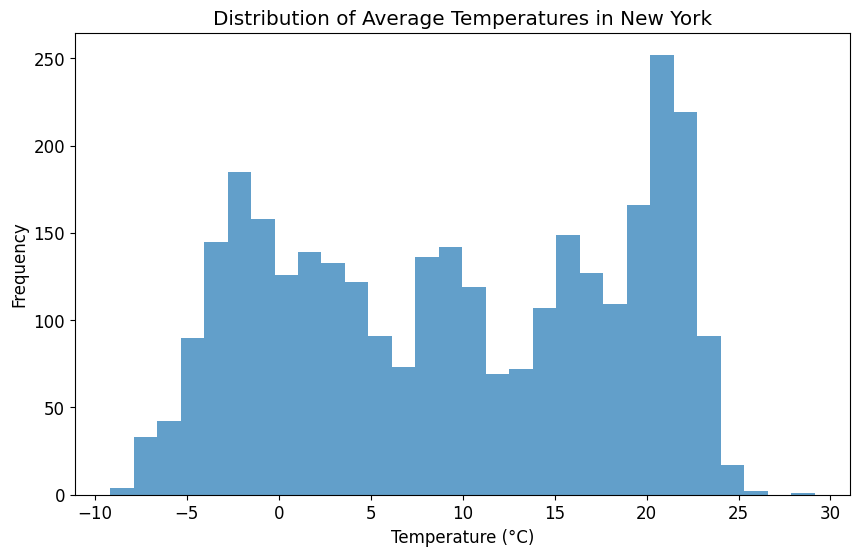

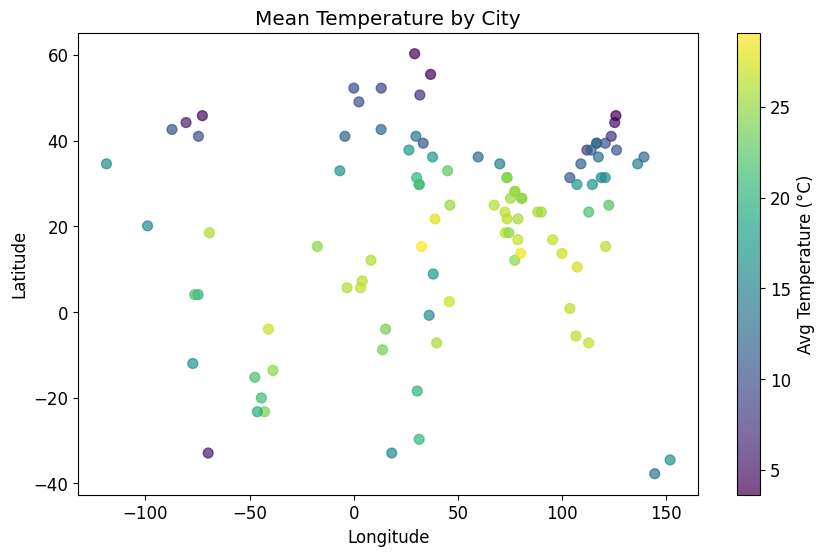

<ipython-input-1-e97fe9c5832c>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['Year'] = df_ny['dt'].dt.year


<Figure size 1200x600 with 0 Axes>

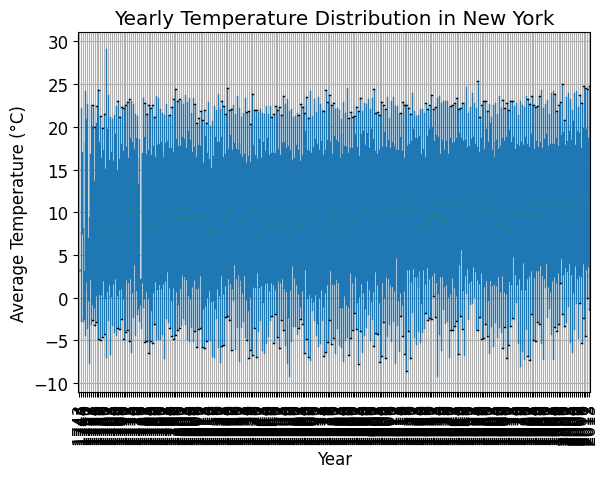

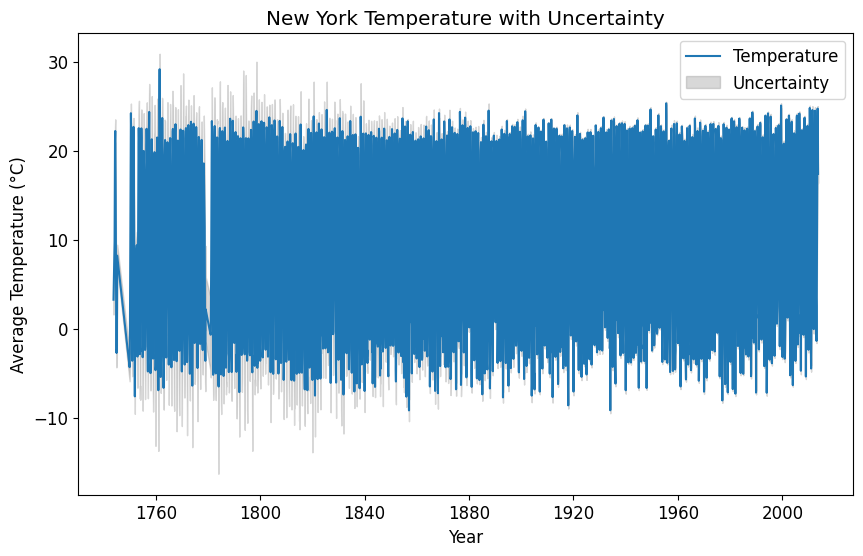

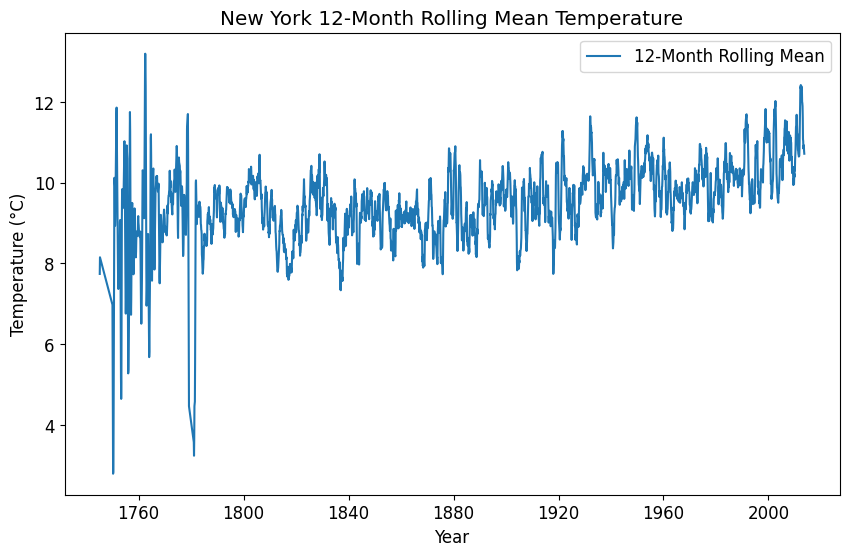

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Increase font size for readability
plt.rcParams.update({'font.size': 12})

# Read the dataset
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

# Convert the 'dt' column to datetime and drop rows with missing temperatures
df['dt'] = pd.to_datetime(df['dt'])
df = df.dropna(subset=['AverageTemperature'])

# Display first few rows to check data
print(df.head())

# =============================================================================
# Graph 1: Time Series of Average Temperature for New York
# =============================================================================
# Subset data for New York
df_ny = df[df['City'] == "New York"]

plt.figure(figsize=(10, 6))
plt.plot(df_ny['dt'], df_ny['AverageTemperature'], label="New York")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("New York Average Temperature Over Time")
plt.legend()
plt.show()

# =============================================================================
# Graph 2: Comparison of Temperature Trends for New York vs. London
# =============================================================================
df_london = df[df['City'] == "London"]

plt.figure(figsize=(10, 6))
plt.plot(df_ny['dt'], df_ny['AverageTemperature'], label="New York")
plt.plot(df_london['dt'], df_london['AverageTemperature'], label="London")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Trends: New York vs. London")
plt.legend()
plt.show()

# =============================================================================
# Graph 3: Histogram of Average Temperature Distribution in New York
# =============================================================================
plt.figure(figsize=(10, 6))
plt.hist(df_ny['AverageTemperature'], bins=30, alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Temperatures in New York")
plt.show()

# =============================================================================
# Graph 4: Scatter Plot of Average Temperature by City (Geospatial View)
# =============================================================================
# First, compute the mean temperature for each city
city_avg = df.groupby(['City','Country','Latitude','Longitude'])['AverageTemperature'].mean().reset_index()

# Define a helper function to convert coordinates (e.g., "40.7N" to 40.7, "74.0W" to -74.0)
def convert_coord(coord):
    if coord[-1] in ['N', 'E']:
        return float(coord[:-1])
    else:
        return -float(coord[:-1])

city_avg['lat'] = city_avg['Latitude'].apply(convert_coord)
city_avg['lon'] = city_avg['Longitude'].apply(convert_coord)

plt.figure(figsize=(10, 6))
sc = plt.scatter(city_avg['lon'], city_avg['lat'], c=city_avg['AverageTemperature'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean Temperature by City")
plt.colorbar(sc, label="Avg Temperature (°C)")
plt.show()

# =============================================================================
# Graph 5: Boxplot of Yearly Temperature Distribution in New York
# =============================================================================
df_ny['Year'] = df_ny['dt'].dt.year

plt.figure(figsize=(12, 6))
# Create a boxplot by year
df_ny.boxplot(column='AverageTemperature', by='Year', rot=90)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Yearly Temperature Distribution in New York")
plt.suptitle("")  # Remove the automatic subtitle
plt.show()

# =============================================================================
# Graph 6: New York Temperature with Uncertainty Bands
# =============================================================================
plt.figure(figsize=(10, 6))
plt.plot(df_ny['dt'], df_ny['AverageTemperature'], label="Temperature")
plt.fill_between(df_ny['dt'],
                 df_ny['AverageTemperature'] - df_ny['AverageTemperatureUncertainty'],
                 df_ny['AverageTemperature'] + df_ny['AverageTemperatureUncertainty'],
                 color='gray', alpha=0.3, label="Uncertainty")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("New York Temperature with Uncertainty")
plt.legend()
plt.show()

# =============================================================================
# Graph 7: 12-Month Rolling Mean Temperature for New York
# =============================================================================
df_ny_sorted = df_ny.sort_values('dt')
rolling_mean = df_ny_sorted['AverageTemperature'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_ny_sorted['dt'], rolling_mean, label="12-Month Rolling Mean")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("New York 12-Month Rolling Mean Temperature")
plt.legend()
plt.show()
